# TFR 

Here for each trial we are computing the [time frequency representation](https://en.wikipedia.org/wiki/Time%E2%80%93frequency_representation). We use the [mne function](https://mne.tools/stable/generated/mne.time_frequency.tfr_array_morlet.html#mne.time_frequency.tfr_array_morlet) which operate on the already preprocessed array. This kind of representation allow us to see the frequency content of the signal in each time point for each channel. The pattern in the frequency domain can be very informative to solve the classification problem.

In [4]:
import torch

base_path = './data/face_recognition_preprocessed_data/'
X = torch.load(base_path + '/dataset/X.pt')
y = torch.load(base_path + '/dataset/target_labels.pt')

print(X.shape, y.shape)

torch.Size([15392, 74, 189]) torch.Size([15392])


In [5]:
print(y.unique())

data_per_class = []
for elem in y.unique().tolist():
    data_per_class.append(X[torch.where(y == elem)])

print(len(data_per_class) == len(y.unique().tolist()))
print(len(data_per_class))

tensor([ 5.,  6.,  7., 13., 14., 15., 17., 18., 19.])
True
9


Applying baseline correction (mode: mean)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  74 out of  74 | elapsed:    0.1s finished


(74, 76, 189)
(190,) (77,)


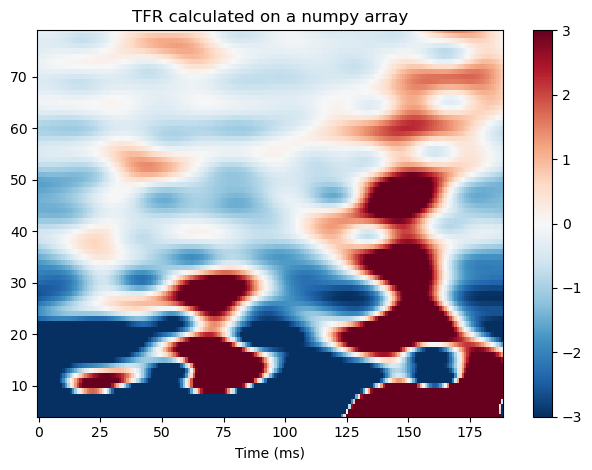

In [106]:

# <Info | 8 non-empty values
#  bads: []
#  ch_names: EEG001, EEG002, EEG003, EEG004, EEG005, EEG006, EEG007, EEG008, ...
#  chs: 74 EEG
#  custom_ref_applied: False
#  dig: 77 items (3 Cardinal, 74 EEG)
#  highpass: 0.0 Hz
#  lowpass: 125.0 Hz
#  meas_date: unspecified
#  nchan: 74
#  projs: []
#  sfreq: 250.0 Hz
# >


from mne.time_frequency import tfr_array_morlet
import numpy as np
from mne.baseline import rescale
from mne.viz.utils import centers_to_edges
import matplotlib.pyplot as plt
%matplotlib inline


freqs = np.arange(4.0, 80.0, 1.0)
n_cycles = freqs / 3.0  # different number of cycle per frequency
sfreq = 250.0  # sampling in Hz

power = tfr_array_morlet(
    data_per_class[0][0][None,:],
    sfreq=sfreq,
    freqs=freqs,
    n_jobs=8,
    n_cycles=n_cycles,
    output='avg_power', # get tfr per trial
)
# Baseline the output

times = np.arange(0.0, 0.189, 0.001, dtype=np.float16) 

rescale(power, times, (0.0, 0.189), mode="mean", copy=False)
fig, ax = plt.subplots()

x, y = centers_to_edges(times * 1000, freqs)

print(power.shape)
print(x.shape, y.shape)

vmin, vmax = -3.0, 3.0 # Define our color limits.

mesh = ax.pcolormesh(x, y, power[10]*1e11, cmap="RdBu_r", vmin=vmin, vmax=vmax)
ax.set_title("TFR calculated on a numpy array")
ax.set(ylim=freqs[[0, -1]], xlabel="Time (ms)")
fig.colorbar(mesh)
plt.tight_layout()

plt.show()

Applying baseline correction (mode: mean)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  74 out of  74 | elapsed:    0.1s finished


(74, 76, 189)
(190,) (77,)


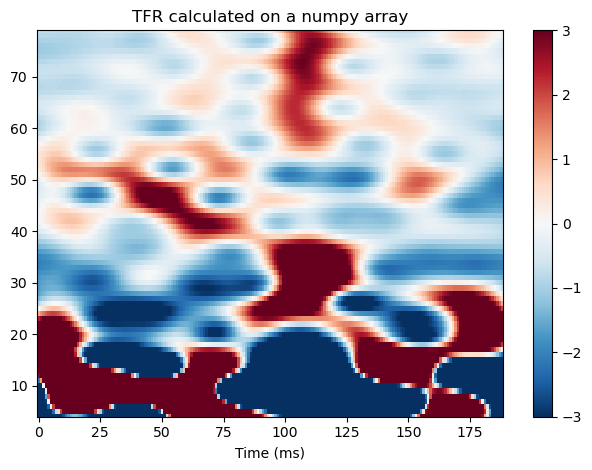

In [107]:

# <Info | 8 non-empty values
#  bads: []
#  ch_names: EEG001, EEG002, EEG003, EEG004, EEG005, EEG006, EEG007, EEG008, ...
#  chs: 74 EEG
#  custom_ref_applied: False
#  dig: 77 items (3 Cardinal, 74 EEG)
#  highpass: 0.0 Hz
#  lowpass: 125.0 Hz
#  meas_date: unspecified
#  nchan: 74
#  projs: []
#  sfreq: 250.0 Hz
# >


from mne.time_frequency import tfr_array_morlet
import numpy as np
from mne.baseline import rescale
from mne.viz.utils import centers_to_edges
import matplotlib.pyplot as plt
%matplotlib inline


freqs = np.arange(4.0, 80.0, 1.0)
n_cycles = freqs / 3.0  # different number of cycle per frequency
sfreq = 250.0  # sampling in Hz

power = tfr_array_morlet(
    data_per_class[1][0][None,:],
    sfreq=sfreq,
    freqs=freqs,
    n_jobs=8,
    n_cycles=n_cycles,
    output='avg_power', # get tfr per trial
)
# Baseline the output

times = np.arange(0.0, 0.189, 0.001, dtype=np.float16) 

rescale(power, times, (0.0, 0.189), mode="mean", copy=False)
fig, ax = plt.subplots()

x, y = centers_to_edges(times * 1000, freqs)

print(power.shape)
print(x.shape, y.shape)

vmin, vmax = -3.0, 3.0 # Define our color limits.

mesh = ax.pcolormesh(x, y, power[10]*1e11, cmap="RdBu_r", vmin=vmin, vmax=vmax)
ax.set_title("TFR calculated on a numpy array")
ax.set(ylim=freqs[[0, -1]], xlabel="Time (ms)")
fig.colorbar(mesh)
plt.tight_layout()

plt.show()

In [ ]:

# <Info | 8 non-empty values
#  bads: []
#  ch_names: EEG001, EEG002, EEG003, EEG004, EEG005, EEG006, EEG007, EEG008, ...
#  chs: 74 EEG
#  custom_ref_applied: False
#  dig: 77 items (3 Cardinal, 74 EEG)
#  highpass: 0.0 Hz
#  lowpass: 125.0 Hz
#  meas_date: unspecified
#  nchan: 74
#  projs: []
#  sfreq: 250.0 Hz
# >


from mne.time_frequency import tfr_array_morlet
import numpy as np
from mne.baseline import rescale
from mne.viz.utils import centers_to_edges
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'pad_inches':0}

freqs = np.arange(4.0, 80.0, 8.0)
n_cycles = freqs / 3.0  # different number of cycle per frequency
sfreq = 250.0  # sampling in Hz

power = tfr_array_morlet(
    data_per_class[5][:1000],
    sfreq=sfreq,
    freqs=freqs,
    n_jobs=16,
    n_cycles=n_cycles,
    output='complex', # get tfr per trial
)
# Baseline the output

times = np.arange(0.0, 0.189, 0.001, dtype=np.float16) 

rescale(power, times, (0.0, 0.189), mode="mean", copy=False)

fig, ax = plt.subplots()

x, y = centers_to_edges(times * 1000, freqs)

print(power.shape)
print(x.shape, y.shape)

vmin, vmax = -3.0, 3.0 # Define our color limits.

mesh = ax.pcolormesh(x, y, power[10]*1e11, cmap="RdBu_r", vmin=vmin, vmax=vmax)
# ax.set_title("TFR calculated on a numpy array")
# ax.set(ylim=freqs[[0, -1]], xlabel="Time (ms)")
# fig.colorbar(mesh)
# plt.tight_layout()

# ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
# ax.set_frame_on(False)

plt.axis('off')

plt.savefig('tfr_example.png', bbox_inches = 'tight', pad_inches = 0)

plt.show()


In [17]:
power.shape

(1000, 74, 10, 189)

In [165]:
# from fig to array
array = np.array(fig.canvas.renderer._renderer)

print(array.shape)

# load the image
from PIL import Image
img = Image.open('tfr_example.png')

# convert image to numpy array
data = np.asarray(img)

data.shape

(369, 496, 4)


(369, 496, 4)

Here the script to convert the preprocessed data into the TFR representation.

In [4]:
import numpy as np
np.arange(0, 10000, 100)

array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
       1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
       2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200,
       3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300,
       4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
       5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500,
       6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600,
       7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700,
       8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800,
       9900])

In [1]:
from mne.time_frequency import tfr_array_morlet
import numpy as np
from mne.baseline import rescale
from mne.viz.utils import centers_to_edges
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'pad_inches':0}
plt.ioff()

from tqdm import tqdm
import torch


###########################################################


base_path = './data/face_recognition_preprocessed_data/'
X = torch.load(base_path + '/dataset/X.pt')
y = torch.load(base_path + '/dataset/target_labels.pt')

print(X.shape, y.shape)

###########################################################

print(y.unique())

data_per_class = []
for elem in y.unique().tolist():
    data_per_class.append(X[torch.where(y == elem)])

print(len(data_per_class) == len(y.unique().tolist()))
print(len(data_per_class))


###########################################################

freqs = np.arange(4.0, 80.0, 3.0)
n_cycles = freqs / 3.0  # different number of cycle per frequency
sfreq = 250.0  # sampling in Hz
times = np.arange(0.0, 0.189, 0.001, dtype=np.float16) 

n_sample_per_class = 150

###########################################################

base_path_save_tfr = './data/face_recognition_preprocessed_data/tfr_dataset/'

# conta = 0

for idx_c, (i_class, idx_class) in enumerate(zip(data_per_class, y.unique().tolist())):
    print(idx_c, i_class.shape, idx_class)

    out = torch.tensor([])
    interval = np.arange(0, i_class.shape[0], 100)

    # split in batches
    for m, M in tqdm(zip(interval[:-1], interval[1:])):

        power = tfr_array_morlet(
            i_class[m:M],
            sfreq=sfreq,
            freqs=freqs,
            n_jobs=16,
            n_cycles=n_cycles,
            output='complex', # get tfr per trial
            verbose=False
        )

        rescale(power, times, (0.0, 0.189), mode="mean", copy=False, verbose=False)

        out = torch.cat((out, torch.from_numpy(power*1e11).type(torch.float32)), dim=0)

    print(out.shape)
    torch.save(out, base_path_save_tfr+'data_per_class_{}.pt'.format(idx_class))
    

# plt.savefig('tfr_example.png', bbox_inches = 'tight', pad_inches = 0)

torch.Size([15392, 74, 189]) torch.Size([15392])
tensor([ 5.,  6.,  7., 13., 14., 15., 17., 18., 19.])
True
9
0 torch.Size([2628, 74, 189]) 5.0


0it [00:00, ?it/s]/tmp/ipykernel_3356/50160446.py:71: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:276.)
  out = torch.cat((out, torch.from_numpy(power*1e11).type(torch.float32)), dim=0)
26it [00:51,  1.98s/it]


torch.Size([2600, 74, 26, 189])
1 torch.Size([1273, 74, 189]) 6.0


12it [00:24,  2.07s/it]


torch.Size([1200, 74, 26, 189])
2 torch.Size([1253, 74, 189]) 7.0


12it [00:20,  1.68s/it]


torch.Size([1200, 74, 26, 189])
3 torch.Size([2588, 74, 189]) 13.0


25it [00:45,  1.82s/it]


torch.Size([2500, 74, 26, 189])
4 torch.Size([1252, 74, 189]) 14.0


12it [00:20,  1.72s/it]


torch.Size([1200, 74, 26, 189])
5 torch.Size([1257, 74, 189]) 15.0


12it [00:21,  1.80s/it]


torch.Size([1200, 74, 26, 189])
6 torch.Size([2614, 74, 189]) 17.0


26it [00:48,  1.88s/it]


torch.Size([2600, 74, 26, 189])
7 torch.Size([1234, 74, 189]) 18.0


12it [00:20,  1.74s/it]


torch.Size([1200, 74, 26, 189])
8 torch.Size([1293, 74, 189]) 19.0


12it [00:22,  1.90s/it]


torch.Size([1200, 74, 26, 189])


Code to compute the tfr and convertit into images. Due to the memory load I didn't explored this path.

In [11]:
from mne.time_frequency import tfr_array_morlet
import numpy as np
from mne.baseline import rescale
from mne.viz.utils import centers_to_edges
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'pad_inches':0}
plt.ioff()

from tqdm import tqdm
import torch


###########################################################


base_path = './data/face_recognition_preprocessed_data/'
X = torch.load(base_path + '/dataset/X.pt')
y = torch.load(base_path + '/dataset/target_labels.pt')

print(X.shape, y.shape)

###########################################################

print(y.unique())

data_per_class = []
for elem in y.unique().tolist():
    data_per_class.append(X[torch.where(y == elem)])

print(len(data_per_class) == len(y.unique().tolist()))
print(len(data_per_class))


###########################################################

freqs = np.arange(4.0, 80.0, 8.0)
n_cycles = freqs / 3.0  # different number of cycle per frequency
sfreq = 250.0  # sampling in Hz
times = np.arange(0.0, 0.189, 0.001, dtype=np.float16) 

n_sample_per_class = 150

###########################################################

base_path_save_tfr = './data/face_recognition_preprocessed_data/tfr_dataset/'

# conta = 0

for idx_c, (i_class, idx_class) in enumerate(zip(data_per_class, y.unique().tolist())):

    # trial_per_class = []

    for idx_trial ,i_trial in tqdm(enumerate(i_class[:n_sample_per_class])):
        power = tfr_array_morlet(
            i_trial[None,:],
            sfreq=sfreq,
            freqs=freqs,
            n_jobs=16,
            n_cycles=n_cycles,
            output='avg_power', # get tfr per trial
            verbose=False
        )

        rescale(power, times, (0.0, 0.189), mode="mean", copy=False, verbose=False)

        channel_per_trial = []

        for channel in power:

            fig, ax = plt.subplots()

            x, y = centers_to_edges(times * 1000, freqs)

            # print(power.shape)
            # print(x.shape, y.shape)

            vmin, vmax = -3.0, 3.0 # Define our color limits.

            mesh = ax.pcolormesh(x, y, channel*1e11, cmap="RdBu_r", vmin=vmin, vmax=vmax)

            plt.axis('off')

            fig.canvas.draw()

            array = np.array(fig.canvas.renderer._renderer)

            # if idx_c == conta:
            #     plt.imshow(array)
            #     conta = conta + 1


            channel_per_trial.append(array)

        torch.save(torch.from_numpy(np.array(channel_per_trial)).type(torch.uint8), base_path_save_tfr+'data_per_class_{}_trial_{}.pt'.format(idx_class, idx_trial))
    



# plt.savefig('tfr_example.png', bbox_inches = 'tight', pad_inches = 0)

torch.Size([15392, 74, 189]) torch.Size([15392])
tensor([ 5.,  6.,  7., 13., 14., 15., 17., 18., 19.])
True
9


0it [00:00, ?it/s]/tmp/ipykernel_2752/3698892273.py:71: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()
107it [03:16,  1.89s/it]

: 

: 

In [158]:
data_per_class[0].shape,data_per_class[1].shape,data_per_class[2].shape,data_per_class[3].shape,data_per_class[4].shape,data_per_class[5].shape,data_per_class[6].shape

(torch.Size([2628, 74, 189]),
 torch.Size([1273, 74, 189]),
 torch.Size([1253, 74, 189]),
 torch.Size([2588, 74, 189]),
 torch.Size([1252, 74, 189]),
 torch.Size([1257, 74, 189]),
 torch.Size([2614, 74, 189]))

In [168]:
# np.array(fig.canvas.renderer._renderer)

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255